In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Loading DataSets

In [2]:
fake = pd.read_csv("C:/Users/JYOTHISH/Downloads/Fake.csv/Fake.csv")
true = pd.read_csv("C:/Users/JYOTHISH/Downloads/True.csv/True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
#DATA CLEANING and PREPARATION


#Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [8]:
#Concatenate dataframes

data = pd.concat([fake,true]).reset_index(drop = True)
data.shape

(44898, 5)

In [9]:
#shuffle the data

from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True) #shuffle the data and reset index by dropping previous and assigning new asper order.
# data = data.reset_index(drop=True)

In [10]:
# Check the DataFrame data

data.head()

,title,text,subject,date,target
0,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,News,"January 18, 2017",fake
1,BIG HYPOCRITE GLORIA STEINEM: Women Support Be...,Gloria Steinem does pretty much everything she...,politics,"Feb 6, 2016",fake
2,New U.S. government rules restrict travel and ...,WASHINGTON/HAVANA (Reuters) - The U.S. governm...,worldnews,"November 8, 2017",true
3,Economic growth to partially offset deficit im...,WASHINGTON (Reuters) - The Republican tax bill...,politicsNews,"November 30, 2017",true
4,Hillary Clinton and Bernie Sanders Join Force...,While the New York primary election has unleas...,News,"April 14, 2016",fake


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [12]:
# Removing the date column

data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,News,fake
1,BIG HYPOCRITE GLORIA STEINEM: Women Support Be...,Gloria Steinem does pretty much everything she...,politics,fake
2,New U.S. government rules restrict travel and ...,WASHINGTON/HAVANA (Reuters) - The U.S. governm...,worldnews,true
3,Economic growth to partially offset deficit im...,WASHINGTON (Reuters) - The Republican tax bill...,politicsNews,true
4,Hillary Clinton and Bernie Sanders Join Force...,While the New York primary election has unleas...,News,fake


In [13]:
# Removing the title Column

data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,It can be said that Late Show host Stephen Col...,News,fake
1,Gloria Steinem does pretty much everything she...,politics,fake
2,WASHINGTON/HAVANA (Reuters) - The U.S. governm...,worldnews,true
3,WASHINGTON (Reuters) - The Republican tax bill...,politicsNews,true
4,While the New York primary election has unleas...,News,fake


In [14]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,it can be said that late show host stephen col...,News,fake
1,gloria steinem does pretty much everything she...,politics,fake
2,washington/havana (reuters) - the u.s. governm...,worldnews,true
3,washington (reuters) - the republican tax bill...,politicsNews,true
4,while the new york primary election has unleas...,News,fake


In [15]:
# Remove the Punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [16]:
# Checking

data.head()

,text,subject,target
0,it can be said that late show host stephen col...,News,fake
1,gloria steinem does pretty much everything she...,politics,fake
2,washingtonhavana reuters the us government ma...,worldnews,true
3,washington reuters the republican tax bill wo...,politicsNews,true
4,while the new york primary election has unleas...,News,fake


In [17]:
# Removing STOPWORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JYOTHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data.head()

,text,subject,target
0,said late show host stephen colbert clearly gi...,News,fake
1,gloria steinem pretty much everything prove bi...,politics,fake
2,washingtonhavana reuters us government made to...,worldnews,true
3,washington reuters republican tax bill would g...,politicsNews,true
4,new york primary election unleashed harsh sent...,News,fake


# Basic Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


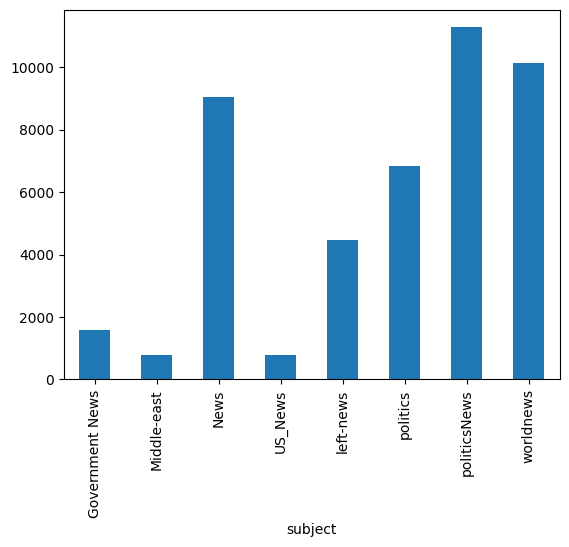

In [19]:
#How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


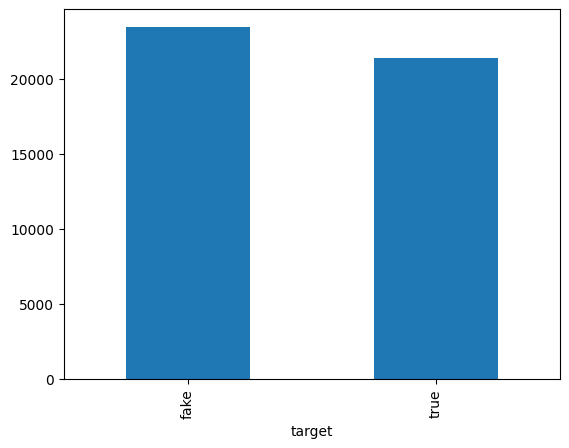

In [20]:
# How many fake and real articles?

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [21]:
!pip install wordcloud

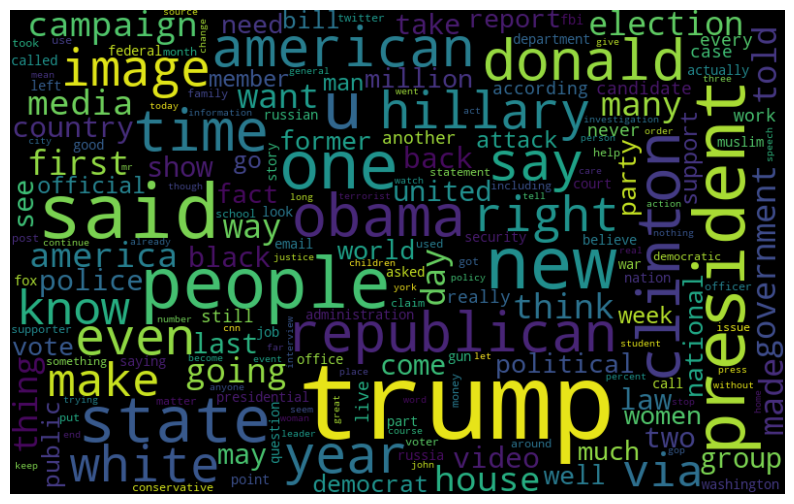

In [22]:
# Word Cloud for Fake News

from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800,height= 500,max_font_size = 110,
                        collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

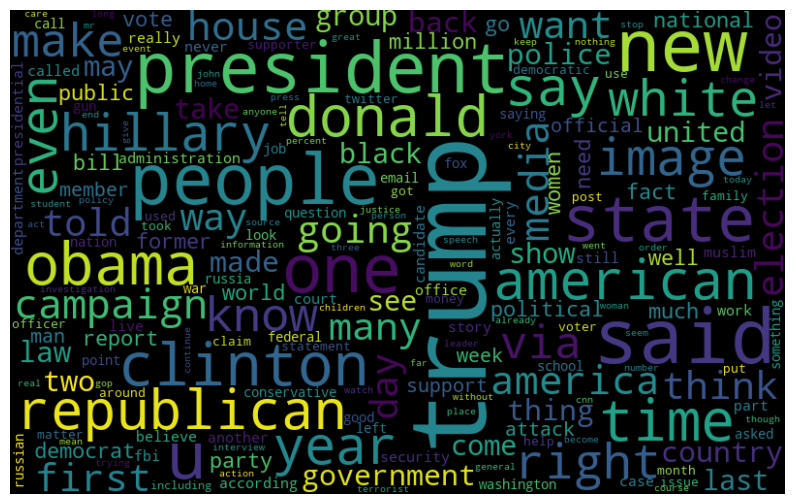

In [23]:
# Word cloud for real news

from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
# Most frequent words counter

from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

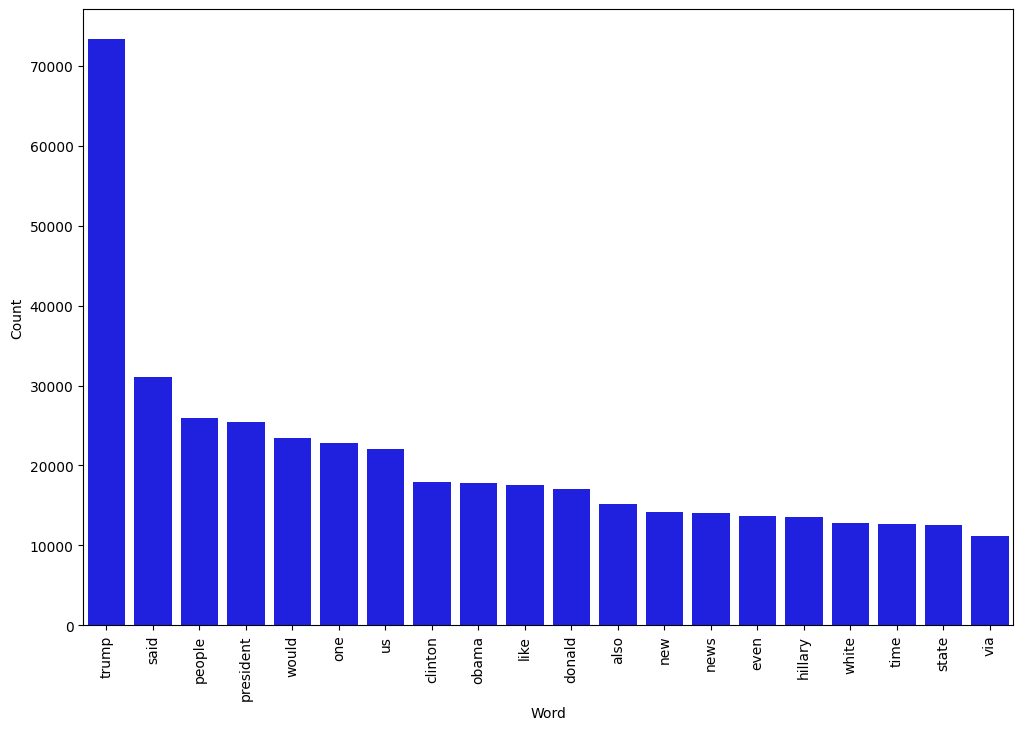

In [25]:
# Most frequent words in fake news

counter(data[data["target"] == "fake"], "text", 20)

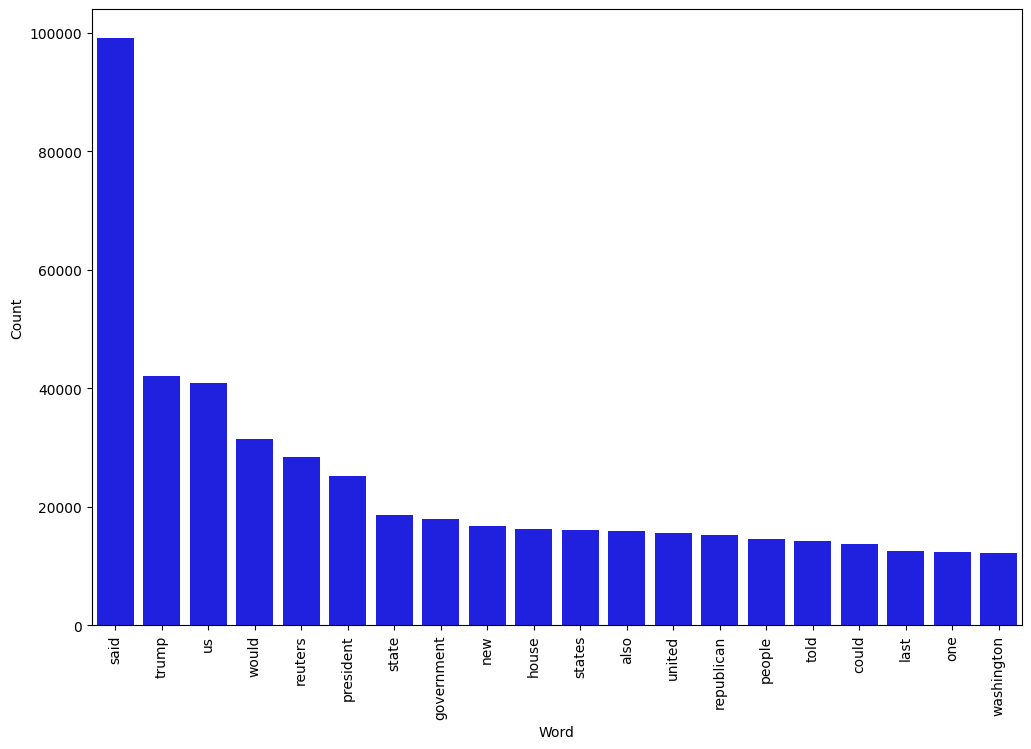

In [26]:
# Most frequent words in real news

counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [27]:
# Function to plot the confusion matrix

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Split Data

In [28]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [29]:
X_train.head()

36335    harare reuters zimbabwe opposition movement de...
12384    speaker house paul ryan rwi refused rule accep...
24419    brasiliacaracas reuters dismissed venezuelan p...
24740    madrid reuters two former members catalan gove...
27039    jerusalem reuters senior member israel’s gover...
Name: text, dtype: object

In [30]:
y_train.head()

36335    true
12384    fake
24419    true
24740    true
27039    true
Name: target, dtype: object

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {}%".format(round(accuracy * 100, 2)))

# Precision
precision = precision_score(y_test, predictions, average='weighted')
print("Precision: {}%".format(round(precision * 100, 2)))

# Recall
recall = recall_score(y_test, predictions, average='weighted')
print("Recall: {}%".format(round(recall * 100, 2)))

# F1 Score
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score: {}%".format(round(f1 * 100, 2)))



Accuracy: 95.56%
Precision: 95.68%
Recall: 95.56%
F1 Score: 95.55%


# Confusion Matrix

Confusion matrix, without normalization


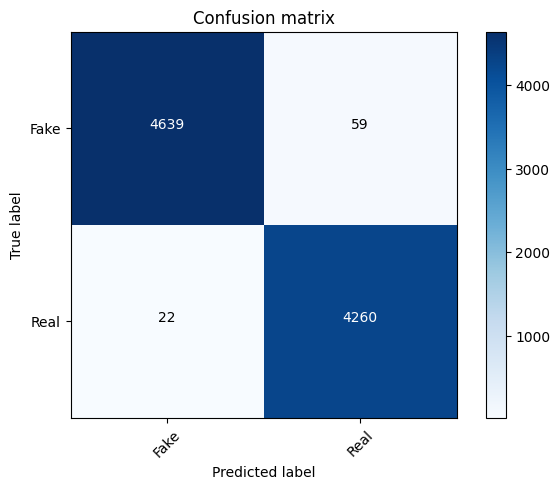

In [34]:
# Plot Confusion Matrix

cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])